In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 클래스공부 7단계

### 함수공부

`-` 다시 함수를 공부해보자

In [2]:
def f(x):
    return x+1

In [3]:
f(3)

4

`-` 함수의 사용방법?
- 입력으로 변수 x를 받음 = 입력으로 인스턴스 x를 받음
- 출력으로 변수 x+1을 리턴 = 출력으로 인스턴스 x+1을 리턴

`-` 사실1: 파이썬에서 함수는 인스턴스를 입력으로 받고 인스턴스를 출력한다.

`-` 함수의 자료형?

In [5]:
f

<function __main__.f(x)>

In [6]:
?f

Signature: f(x)
Docstring: <no docstring>
File:      ~/Dropbox/coco/posts/python/<ipython-input-2-9897bae5f29b>
Type:      function


- type이 function 이다.
- f는 function 의 class의 instance이다.
- 결국 f도 하나의 오브젝트에 불과하다.

`-` 사실2: 함수도 결국 인스턴스이다. -> 함수의 입력으로 함수를 쓸 수도 있고 함수의 출력으로 함수가 나올 수도 있다.

### 함수형 프로그래밍

(예제1) 숫자입력, 함수출력

In [7]:
def f(a):
    def _f(x):
        return (x-a)**2
    return _f

In [10]:
g=f(10)    # g(x) = (x-10)**2

In [11]:
g(2)    # (8)**2

64

- 해석: f(a)는 a를 입력으로 받고 g(x) = (x-a)^2 함수를 리턴해주는 함수

(예제1)의 다른표현: 익명함수 lambda

표현1

In [17]:
def f(a):
    _f = lambda x: (x-a)**2   # lambda x : (x-a)**2 가 실행되는 순간 함수오브젝트가 만들어지고 그것이 _f로 저장됨
    return _f

In [18]:
g=f(10)    # g(x) = (x-10)**2

In [19]:
g(2)

64

표현2

In [20]:
def f(a):
    return lambda x: (x-a)**2

In [21]:
g=f(10)    # g(x) = (x-10)**2

In [22]:
g(2)

64

- `lambda x: (x-a)**2` 는 $\text{lambda}(x) = (x-a)^2$ 의 느낌으로 기억하면 쉽다.
- `lambda x: (x-a)**2` 는 "아직 이름이 없는 함수 오브젝트를 (가칭 lmabda라고 하자) 만들고 기능은 x를 입력으로 하고 (x-a)**2를 출력하도록 하자" 라는 뜻이로 해석

In [24]:
(lambda x,y : x<y)(2,3)

True

In [26]:
f=lambda x,y : x<y   # 위와 같은 코드
f(2,3)

True

(예제2) 함수입력, 숫자출력

In [27]:
def f(x):
    return x**2

In [28]:
f(3)

9

In [31]:
def d(f,x):    # 함수를 입력을 받는 함수를 정의
    h=0.0000000000001
    return (f(x+h)-f(x)) / h

$$f'(x)\approx \frac{f(x+h)-f(x)}{h}$$

- $h$ 의 값이 점점 0에 가까울수록 등호에 가까워짐

In [32]:
d(f,4)   # f'(4) = 2*4 = 8

8.029132914089132

(예제3) 함수입력, 함수출력

In [42]:
def f(x):
    return x**2

In [46]:
def derivate(f):
    def df(x):
        h=0.0000000000001
        return (f(x+h)-f(x)) / h
    return df

In [47]:
ff = derivate(f)  # f미분

In [49]:
ff(10)  #f의 도함수

19.895196601282805

**원래함수 시각화**

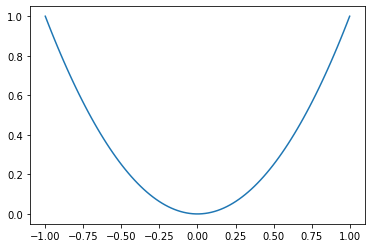

In [50]:
x=np.linspace(-1,1,100)
plt.plot(x,f(x))

**도함수 시각화**

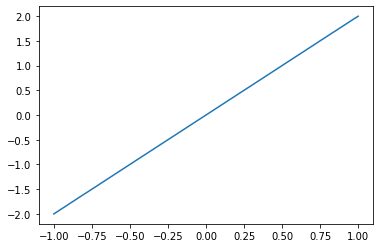

In [52]:
x=np.linspace(-1,1,100)
plt.plot(x,ff(x))

(예제3)의 다른표현

In [53]:
def f(x):
    return x**2

In [54]:
def derivate(f):
    h=0.0000000000001
    return lambda x:(f(x+h)-f(x)) / h

In [55]:
ff=derivate(f)

In [56]:
ff(10)

19.895196601282805

(예제4) 함수들의 리스트

In [58]:
# # 리스트의 컴마 컴마 안에 들어갈 수 있는것은 
# [인스턴스, 인스턴스, 인스턴스]
# [오브젝트, 오브젝트, 오브젝트]
# [함수오브젝트, 함수오브젝트, 함수오브젝트]
# # ....

In [59]:
flst = [lambda x:x, lambda x:x**2, lambda x:x**3]
flst

[<function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>]

In [60]:
for f in flst:
    print(f(2))

2
4
8


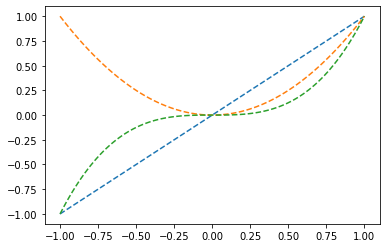

In [61]:
for f in flst:
    plt.plot(x,f(x),'--')

위 아래 동일

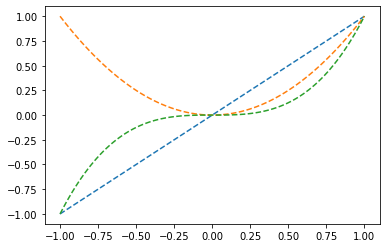

In [65]:
plt.plot(x, (lambda x:x)(x),'--')
plt.plot(x, (lambda x:x**2)(x),'--')
plt.plot(x, (lambda x:x**3)(x),'--')

### 정리

`-` 지금까지 개념
- 함수: 변수를 입력으로 받아서 변수를 출력하는 개념
- 변수: 어떠한 값을 저장하는 용도로 쓰이거나 함수의 입력 혹은 출력으로 사용함

`-` 파이썬의 함수형프로그래밍을 잘하려면?
- 변수든 함수든 둘다 인스턴스임
- 변수를 함수처럼: 메소드
- 함수를 변수처럼($\star$) : 함수자체를 함수의 입력으로 혹은 출력으로 쓸 수도 있음. 함수를 특정 값처럼 생각해서 함수들의 list를 만들 수도 있다.

### collable object

`-` 함수 오브젝트의 비밀?

In [66]:
f = lambda x: x+1

In [68]:
f(4)

5

In [69]:
?f

Signature: f(x)
Docstring: <no docstring>
File:      ~/Dropbox/coco/posts/python/<ipython-input-66-1a55436594c9>
Type:      function


In [70]:
dir(f)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [71]:
set(dir(f)) & {'__call__'}

{'__call__'}

- 함수 오브젝트에는 숨겨징 기능 `__call__`이 있다.

In [72]:
f.__call__(3)    # f(3)

4

In [73]:
f.__call__(4)   # f(4)

5

- 여기에 우리가 정의한 내용이 있따.

call 만 정의를 해주면 함수처럼 쓸 수 있다 ?! -> list의 dir 확인해보면 call 없음

`-` 함수처럼 쓸 수 없는 인스턴스는 단지 call이 없는 것일 뿐이다.

In [74]:
class Klass:
    def __init__(self):
        self.name = 'boram'

In [75]:
a=Klass()

In [76]:
a()

TypeError: 'Klass' object is not callable

- TypeError: 'Klass' object is not callable

In [77]:
class Klass2(Klass):  # 상속
    def __call__(self):
        print(self.name)

In [79]:
b=Klass2()

In [80]:
b()

boram


- b는 collable obeject 라는 의미. 즉 숨겨진 메서드로 `__call__`를 가진 오브젝트!
- Klass는 collable object를 만들지 못하지만 Klass2는 collable object를 만든다.

`-` 클래스로 함수를 만들기

In [81]:
class AddConstant:
    def __init__(self,c):
        self.c = c
    def __call__(self,a):
        return a + self.c

In [86]:
f = AddConstant(3)   # collabe object 생성, f.c에는 3이 저장되어 있음.

In [89]:
f(7)   # f.c와 7을 더하는 기능을 수행, # f(x) = x+3 을 수행함

10

In [90]:
f(10)

13

`-` 클래스도 일종의 `오브젝트`이고 함수처럼 `Klass()`와 같이 사용하여 인스턴스를 만들었음. -> `Klass.__call__()`는 `Klass()`와 같은 역할을 할 것이다.

In [91]:
class Klass:
    def __init__(self):
        self.name='coco'
    

In [94]:
a=Klass.__call__()   # 이것이 a=Klass()와 같은 효과

In [93]:
a.name

'coco'

### 파이썬의 비밀 1~4

- 파이썬의 비밀1: 자료형은 클래스의 비밀이다.(11주차)
- 파이썬의 비밀2: 클래스에는 `__str__`처럼 숨겨진 메서드가 존재한다. 이를 이용하여 파이썬 내부의 기능을 가로챌 수 있다.(12주차0523)
- 파이썬의 비밀3: 주피터노트북에서는 "오브젝트이름+엔터" 를 쳐서 나오는 출력은 `__repr__`로 가로챌 수 잇다.(주피터의 비밀)
- 파이썬의 비밀4: 함수와 클래스는 숨겨진 메서드에 `__call__`을 가진 오브젝트일 뿐이다.

## 클래스공부 8단계

### for문의 복습

`-` 아래와 같은 예제들을 관찰하여 for문을 복습하자.

(예제1)

In [95]:
for i in [1,2,3,4]:
    print(i)

1
2
3
4


(예제2)

In [96]:
for i in (1,2,3,4):
    print(i)

1
2
3
4


(예제3)

In [97]:
for i in'1234':
    print(i)

1
2
3
4


(예제4)

In [98]:
a=5
for i in a:
    print(i)

TypeError: 'int' object is not iterable

- 5라고 출력되어야 하지 않나?

`-` 의문1:
```python
for i in ???:
    print(i)
```
에서 ??? 자리에 올수 있는 것이 무엇일까?

(예제5)

상황1

In [99]:
lst = [[1,2,3,4],[3,4,5,6]]
for l in lst:
    print(l)

[1, 2, 3, 4]
[3, 4, 5, 6]


상황2

In [100]:
df=pd.DataFrame(lst)
df

,0,1,2,3
0,1,2,3,4
1,3,4,5,6


In [101]:
for i in df:
    print(i)

0
1
2
3


칼럼이름들이 나오는 것 같음 -> 확인해보자

In [104]:
df.columns = pd.Index(['X'+str(i) for i in range(1,5)])
df

,X1,X2,X3,X4
0,1,2,3,4
1,3,4,5,6


In [106]:
for i in df:
    print(i)

X1
X2
X3
X4


`-` 의문2: for의 출력결과는 어떻게 예측할 수 있을까?

### for문의 동작원리

`-` 의문1의 해결: 아래의 ???자리에 올 수 있는 것은 dir()하여 `__iter__`가 있는 object이다.
```python
for i in ???:
    print(i)
```
이러한 오브젝트를 iterable object라고 한다.

`-` 확인

In [107]:
a=[1,2,3]
set(dir(a)) & {'__iter__'}

{'__iter__'}

In [108]:
a='123'
set(dir(a)) & {'__iter__'}

{'__iter__'}

In [109]:
a=3
set(dir(a)) & {'__iter__'}

set()

- 예상대로 예제 1~4에서는 int클래스의 instance만 `__iter__` 가 없다.

`-` `__iter__` 의 역할: iterable object를 iterator로 만들 수 있다!

In [132]:
lst = [1,2,3]
lst

[1, 2, 3]

In [133]:
lst[1] # 충실한 리스트

2

In [134]:
ltor = iter(lst)
#ltor = lst.__iter__()
ltor

In [135]:
ltor[1]   # 더이상 리스트가 아니다.

TypeError: 'list_iterator' object is not subscriptable

In [136]:
ltor?

Type:        list_iterator
String form: <list_iterator object at 0x7f4b7b39efd0>
Docstring:   <no docstring>


`-` iterator가 되면 무엇이 좋은가? -> 숨겨진 기능 `__next__` 가 열린다.

In [137]:
set(dir(lst)) & {'__next__'}

set()

In [138]:
set(dir(ltor)) & {'__next__'}

{'__next__'}

- lst에는 `__next__`가 없지만 ltor에는 있다!

`-` 그래서 `__next__`의 기능은? -> 원소를 차례대로 꺼내준다. + 더 이상 꺼낼 원소가 없으면 StopIteration Error를 발생시킨다.

In [139]:
lst

[1, 2, 3]

In [140]:
ltor.__next__()

1

In [141]:
ltor.__next__()

2

In [142]:
ltor.__next__()

3

In [143]:
ltor.__next__()

StopIteration: 

`-` for 문의 동작원리

```python
for i in lst
    print(i)
```

(1) `lst.__iter__()` 혹은 `iter(lst)` 를 이용하여 lst를 iterator로 만든다. (iterable object를 iterator object로 만든다.)

(2) iterator에서 `.__next__()` 함수를 호출하고 결과를 i에 저장한 뒤에 for문 블락안에 있는 내용 (들여쓰기 된 내용)을 실행한다.  -> 반복

(3) StopIteration 에러가 발생하면 for무늘 멈춘다. 

`-` 아래의 ??? 자리에 올 수 있는 것이 iterable object가 아니라 iterator 자체여도 for 문이 돌아갈까? -> (당연히 돌아가야 할 것 같음)

```python
for i in ???
    print(i)
```

In [145]:
for i in iter([1,2,3]):
    print(i)

1
2
3


- 당연히 가능!

`-` a가 iterator일때 iter(a) 의 출력결과가 a와 같도록 조정한다면 for문의 동작원리 (1) ~ (3) 을 수정하지 않아도 좋다. -> 실제로 이렇게 동작한다.

In [147]:
ltor?

Type:        list_iterator
String form: <list_iterator object at 0x7f4b7b39efd0>
Docstring:   <no docstring>


In [148]:
dir(ltor)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

`-` 요약
- iterable object는 숨겨진 기능으로 `__iter__`를 가진다.
- iterator object는 숨겨진 기능으로 `__iter__`와 `__next__`를 가진다. (즉 iterator는 그 자체로 iterable object가 된다!)

In [150]:
lst = [1,2,3]
ltor = iter(lst)

In [151]:
set(dir(lst)) & {'__iter__', '__next__'}

{'__iter__'}

In [152]:
set(dir(ltor)) & {'__iter__', '__next__'}

{'__iter__', '__next__'}

`-` 의문2의 해결: for문의 출력결과는 어떻게 예측할 수 있을까? iterator를 만들어서 `__next__()`의 출력값을 확인하면 알 수 있다.

In [153]:
for i in df:
    print(i)

X1
X2
X3
X4


In [154]:
dftor = iter(df)
dftor?

Type:        map
String form: <map object at 0x7f4b7c0d1350>
Docstring:  
map(func, *iterables) --> map object

Make an iterator that computes the function using arguments from
each of the iterables.  Stops when the shortest iterable is exhausted.


In [155]:
dftor.__next__()

'X1'

In [156]:
dftor.__next__()

'X2'

In [157]:
dftor.__next__()

'X3'

In [158]:
dftor.__next__()

'X4'

In [159]:
dftor.__next__()

StopIteration: 

### range()

`-` 파이썬에서 for문을 처음 배울 때: range(5)를 써라! 

In [160]:
for i in range(5):
    print(i)

0
1
2
3
4


- range(5) 가 도대체 무엇인가?

In [163]:
set(dir(range(5))) & {'__iter__', '__next__'}

{'__iter__'}

`-` range(5)의 정체는 그냥 iterable object이다.

`-` 그래서 언제든지 iterator로 바꿀 수 있다.

In [166]:
rtor = iter(range(5))
rtor

In [167]:
set(dir(rtor)) & {'__iter__', '__next__'}

{'__iter__', '__next__'}

`-` for문에서 range(5)가 행동하는 방법?

In [168]:
rtor = iter(range(5))

In [169]:
rtor.__next__()

0

In [170]:
rtor.__next__()

1

In [171]:
rtor.__next__()

2

In [172]:
rtor.__next__()

3

In [173]:
rtor.__next__()

4

In [174]:
rtor.__next__()

StopIteration: 

### zip

`-` 이터레이터의 개념을 알면 for문에 대한 이해도가 대폭 상승한다.

In [175]:
for i in zip([1,2,3],'abc'):
    print(i)

(1, 'a')
(2, 'b')
(3, 'c')


- zip은 뭐지?

In [176]:
zip([1,2,3],'abc')

`-` 어차피 `for i in ????`: 의 ???? 자리는 iterable object의 자리이다.

In [177]:
set(dir(zip([1,2,3],'abc'))) & {'__iter__', '__next__'}

{'__iter__', '__next__'}

- `__next__()` 함수가 있음 $\to$ `zip([1,2,3],'abc')`은 그 자체로 iterator 이다!

In [178]:
z = zip([1,2,3],'abc')

In [179]:
z.__next__()

(1, 'a')

In [180]:
z.__next__()

(2, 'b')

In [181]:
z.__next__()

(3, 'c')

In [182]:
z.__next__()

StopIteration: 

### 사용자정의 이터레이터

`-` 내가 이터레이터를 만들어보자.

In [183]:
class Klass: # 찌를 내는 순간 for문이 멈추도록 하는 이터레이터를 만들자.
    def __init__(self):
        self.candidate = ["묵", "찌", "빠"]
    def __iter__(self):
        return self
    def __next__(self):
        action = np.random.choice(self.candidate)
        if action == "찌":
            print("찌가 나와서 for문을 멈춥니다.")
            raise StopIteration
        else:
            return action

In [184]:
a=Klass()

In [185]:
a?

Type:        Klass
String form: <__main__.Klass object at 0x7f4b7aabf0d0>
Docstring:   <no docstring>


In [187]:
set(dir(a)) & {'__iter__', '__next__'}  # a는 이터레이터

{'__iter__', '__next__'}

In [189]:
a.__next__()

'묵'

In [190]:
a.__next__()

'빠'

In [191]:
a.__next__()

'묵'

In [192]:
a.__next__()

'빠'

In [193]:
a.__next__()

'묵'

In [194]:
a.__next__()

'묵'

In [195]:
a.__next__()

찌가 나와서 for문을 멈춥니다.


StopIteration: 

In [196]:
for i in a:
    print(i)

묵
묵
묵
찌가 나와서 for문을 멈춥니다.


### 파이썬의 비밀 1~5

- 파이썬의 비밀1: 자료형은 클래스의 비밀이다.(11주차)
- 파이썬의 비밀2: 클래스에는 `__str__`처럼 숨겨진 메서드가 존재한다. 이를 이용하여 파이썬 내부의 기능을 가로챌 수 있다.(12주차0523)
- 파이썬의 비밀3: 주피터노트북에서는 "오브젝트이름+엔터" 를 쳐서 나오는 출력은 `__repr__`로 가로챌 수 잇다.(주피터의 비밀)
- 파이썬의 비밀4: 함수와 클래스는 숨겨진 메서드에 `__call__`을 가진 오브젝트일 뿐이다.
- 파이썬의 비밀5: for문의 비밀 (iterable object, iterator, StopIteration Error)

## 클래스공부 9단계

### 예비학습 (변수의 범위)

커널을 재시작하고 아래를 관찰하자

예제1

`-` 관찰1: 함수내의 변수 출력

In [1]:
def f():
    x=10
    print(x)

In [2]:
f()

10


`-` 관찰2: 함수내의 변수가 없을 경우 출력이 되지 않음

In [3]:
def g():
    print(x)

In [4]:
g()

NameError: name 'x' is not defined

`-` 관찰3: 동일한 이름의 변수가 global에 있다면 함수내에 (local에) 그 이름의 변수가 선언되지 않아도 global의 변수를 빌려서 사용함

In [7]:
x=20        # global
def g():    # local
    print(x)

In [8]:
g()

20


`-` 관찰4: f()가 실행되면서 `x=10`이 함수내에 (=local에) 실행되지만 이 결과가 외부의 x=20에 (=global에) 영향을 미치지는 못함

In [10]:
f()

10


In [12]:
x

20

**예제2**

(코드1)

In [15]:
x= 38
def nextyear():
    y=x+1
    print(x,y)
nextyear()

38 39


(코드2)

In [16]:
x= 38
def nextyear():
    y=x+1
    print(x,y)
    x=0
nextyear()

UnboundLocalError: local variable 'x' referenced before assignment

`-` 해석:
- 잘못된 해석: 코드1은 실행되었고 코드 2에서 에러가 남. 코드1과 2의 차이점은 `x=0` 이라는 코드가 코드2에 추가로 포함되어 있다는 것이다. 따라서 `x=0`이 잘못된 코드이고 이걸 실행하는 과정에서 에러가 발생했다.
- 올바른 해석: 코드1에서는 x가 global variable 이고 코드2에서는 x가 local bariable이어서 생기는 문제

`-` 코드2의 올바른 수정

In [17]:
x= 38
def nextyear():
    x=0
    y=x+1
    print(x,y)
nextyear()

0 1


### 인스턴스 변수, 클래스 변수 (12주차) 0518

`-` 예비학습이 주는 교훈

(원칙1) global 에서 정의된 이름은 local에서 정의된 이름이 없을 경우 그를 대신할 수 있다. (local은 경우에 따라서 global에 있는 변수를 빌려 쓸 수 있다.)

(원칙2) local과 global 에서 같은 이름이 'x'가 각각 정의되어 있는 경우? global의 변수와 local의 변수는 각각 따로 행동하며 서로 영향을 주지 않는다. (독립적이다)

- 만약에 local이 global의 변수를 같이 쓰고 있었다고 할지라도, 추후 새롭게 local에 이름이 새롭게 같은 이름의 변수가 정의된다면 그 순간 local과 global의 변수를 각자 따로 행동하며 서로 영향을 주지 않는다. $\to$ 아래 예제 확인

In [18]:
x=10
def f():
    print(x)

In [19]:
f() # x를 빌려쓰는 신세

10


In [22]:
def f():
    x=20   # 이제 새롭게 x를 정의했으니까
    print(x)

In [23]:
f()    # 다른길을 간다

20


`-` 이전에 공부하였던 인스턴스변수와 클래스변수 역시 비슷한 행동을 보인다.

In [31]:
class Moo:
    x=0  # 클래스변수
    
    
    ## 인스턴스변수는 self.x 또는 __init__ 이렇게

In [32]:
moo=Moo()

(관찰1)

In [33]:
Moo.x, moo.x

(0, 0)

- moo.x는 사실 정의한적 없지만 Moo.x 를 빌려쓰고 있다 (원칙1)

(관찰2)

In [34]:
Moo.x=100

In [35]:
Moo.x, moo.x

(100, 100)

- Moo.x를 변화시키면 moo.x도 변화한다. (빌려쓰고 있는 것이므로, 원칙1 재확인)

(관찰3)

In [36]:
moo.x = 200

In [37]:
Moo.x, moo.x

(100, 200)

- moo.x=200 을 하는 순간 새롭게 인스턴스 변수를 선언한 셈이 된다. 따라서 원칙2가 적용되어 이제부터 Moo.x와 moo.x는 서로 독립적으로 행동한다.

(관찰4)

In [38]:
Moo.x= -99

In [39]:
Moo.x, moo.x

(-99, 200)

In [40]:
moo.x=99

In [41]:
Moo.x, moo.x

(-99, 99)

- Moo.x를 바꾼다고 해서 moo.x가 영향받지 않고 moo.x를 바꿔도 Moo.x가 영향 받지 않음 (완전히 독립, 원칙2의 재확인)

`-` 포인트: (1) 클래스변수와 인스턴스 변수의 구분 (2) 인스턴스 변수가 정의되지 않으면 클래스변수를 빌려쓸 수 있음 (3) 인스턴스변수와 클래스변수가 같은 이름으로 저장되어 있으면 각각 독립적으로 행동 

### 인스턴스 메서드

`-` self의 비밀: 사실 클래스에서 정의된 함수의 첫번째 인자의 이름이 꼭 self일 필요는 없다. (무엇으로 전달하든 클래스안에서 정의된 메소드의 첫번째 인자는 기본적으로 instance의 태명 역할을 한다.)

In [48]:
class Moo:
    def __init__(abab):
        abab.name = 'boram'
    def f(self):
        print(self.name)

In [49]:
moo=Moo()

In [50]:
moo.name

'boram'

In [51]:
moo.f()

boram


In [47]:
# self대신에 ababab 이런거 써도 되긴 함

`-` 인스턴스 메서드: 위의 `__init__` 와 `f` 와 같이 첫번째 인자를 인스턴스의 태명으로 받는 함수를 인스턴스 메서드(간단히 메서드) 라고 한다.
- 인스턴스 메소드는 `self.f()` 와 같이 사용한다. 의미는 `f(self)` 이다.

In [52]:
moo.name = 'hynn'

In [55]:
moo.__init__()   # 인스턴스메서드의 사용예시: self.__init__()의 꼴로 사용

In [56]:
moo.name

'boram'

In [57]:
moo.f() # 인스턴스메서드의 사용예시: self.__init__()의 꼴로 사용

boram


In [59]:
Moo.__init__()  # 사용안됨

TypeError: __init__() missing 1 required positional argument: 'abab'

In [60]:
Moo.f()  # 사용안됨

TypeError: f() missing 1 required positional argument: 'self'

### 클래스 메서드

`-` 클래스 메서드: 함수의 첫 인자로 클래스오브젝트를 받는 메서드를 클래스 메서드라고 한다. 

`-` 목표: `Moo.f()`와 같은 형태로 사용할 수 있는 함수를 만들어 보자 -> 클래스 메서드를 만들어보자!

In [62]:
class Moo:
    def f(self):
        print("인스턴스 메서드")

In [63]:
moo=Moo()

In [64]:
moo.f()

인스턴스 메서드


In [65]:
Moo.f()

TypeError: f() missing 1 required positional argument: 'self'

In [67]:
class Moo:
    @classmethod
    def f(cls):  # 함수의 첫 인자로 클래스오브젝트를 받는다. cls는 클래스 Moo의 가칭이라고 생각하면 된다.
        print("클래스 메서드")

In [68]:
moo=Moo()

In [69]:
Moo.f()

클래스 메서드


In [71]:
moo.f()  # 상위에서 정의한걸 빌려옴.. 
#인스턴스 메서드를 따로 정의한적은 없지만 같은 이름의 클래스 메서드가 있으므로 빌려서 씀

클래스 메서드


`-` 예제

In [83]:
class Moo:
    @classmethod
    def set_class_x(cls,value): # 클래스메서드
        cls.x=value   # 클래스변수 선언, note: Moo.x = value와 같은 코드 
    def set_instance_x(self, value): # 인스턴스메서드
        self.x = value  # 인스턴스 변수선언

In [84]:
moo=Moo()

In [85]:
Moo.set_class_x(10)   # 클래스 메서드로 클래스 변수에 10을 설정

In [86]:
Moo.set_instance_x(10)   # 클래스에서 인스턴스 메서드를 사용 -> 사용 불가

TypeError: set_instance_x() missing 1 required positional argument: 'value'

In [87]:
Moo.x, moo.x   # 인스턴스 변수는 따로 설정하지 않았지만 클래스 변수값을 빌려쓰고 있음

(10, 10)

In [90]:
moo.set_class_x(20) # 인스턴스에서는 원래 set_class_x 라는 메서드는 없지만 클래스에는 있어서 빌려씀

In [93]:
Moo.x, moo.x  # 현재 moo.x는 클래스 변수를 빌려쓰고 있는 상황이므로 같이 바뀜

(20, 20)

In [96]:
moo.set_instance_x(-20) # 인스턴스에서 인스턴스 메서드를 사용하여 인스턴스 변수값을 -20으로 설정
#-> 이때부터 인스턴스변수와 클래스 변수는 서로 독립적인 노선을 간다.

In [97]:
Moo.x, moo.x 

(20, -20)

In [100]:
Moo.set_class_x(30)   # 독립적인 노선을 가기로 했으므로 클래스변수만 30으로 바뀜

In [99]:
Moo.x, moo.x 

(30, -20)

In [102]:
moo.set_class_x(-40)   # 여전히 인스턴스에서 set_class_x라는 함수는 없으므로 클래스메서드를 빌려쓰고 있음
Moo.x, moo.x

(-40, -20)

### 스태틱 메서드

`-` 스태틱 메서드: 첫 인자로 인스턴스와 클래스 모두 받지 않음. (클래스 안에 정의되어 있지만 그냥 함수와 같음)

In [103]:
class Cals:
    @staticmethod
    def add(a,b):
        return a+b
    @staticmethod
    def sub(a,b):
        return a-b

In [104]:
fs = Cals()

In [105]:
fs.add(1,2)

3

In [106]:
fs.sub(1,2)

-1

- fs는 그냥 함수들을 묶어놓은 느낌? 정리하기 편하게

## 클래스공부 10단계

### 문자열 join

`-` 예제

In [107]:
lst = list('abcd')

In [108]:
list('abcd')

['a', 'b', 'c', 'd']

In [110]:
'abcd' #위의 리스트를 이렇게 모여서 쓰여지게 하고 싶다

'abcd'

In [111]:
''.join(lst)

'abcd'

`-` 해설: ''는 string object이고 `.join`는 string object에 소속된 메서드이다.

In [112]:
a=''

In [113]:
a?

Type:        str
String form: 
Length:      0
Docstring:  
str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.


In [114]:
a.join?

Signature: a.join(iterable, /)
Docstring:
Concatenate any number of strings.

The string whose method is called is inserted in between each given string.
The result is returned as a new string.

Example: '.'.join(['ab', 'pq', 'rs']) -> 'ab.pq.rs'
Type:      builtin_function_or_method


In [115]:
a.join(lst)  # join(a,lst)와 같은효과

'abcd'

`-` join의 간단한 사용방법

In [117]:
'-'.join(lst)  # '' 안에 - 넣어서 

'a-b-c-d'

### matplotlib

`-` 파이썬의 모든 것은 객체이다: - matplotlib의 다른사용 (객체지향적 언어로 그림 그리기!)

`-` 그림 오브젝트 생성

In [120]:
fig = plt.figure() # 그림 오브젝트가 생성되고 fig라는 이름 

<Figure size 432x288 with 0 Axes>

In [121]:
fig

<Figure size 432x288 with 0 Axes>

`-` 그림 오브젝트의 액시즈를 확인 -> 아무것도 없음..

In [124]:
fig.axes

[]

`-` (0,0) 자리에 (가로=1, 세로=1) 크기의 그림틀(액시즈)을 넣어보자.

In [125]:
fig.add_axes([0,0,1,1])

<Axes:>

In [126]:
fig.axes

[<Axes:>]

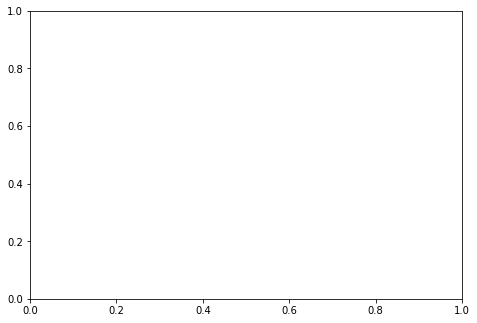

In [127]:
fig

`-` 액시즈추가

In [128]:
fig.add_axes([0,1.2, 1,1])  #   (0,1.2) 위치에  가로길이가 1, 세로길이가 1인 그림

<Axes:>

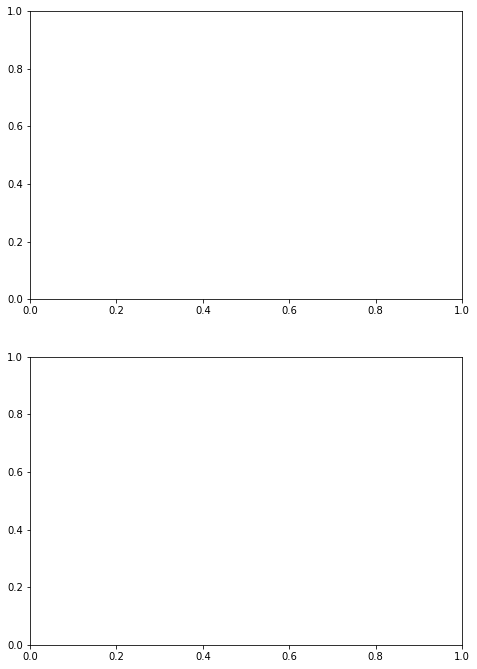

In [129]:
fig

`-` (0.5,0.5) 위치에 (가로=1, 세로=1 ) 크기의 그림 추가

In [130]:
fig.add_axes([0.5,0.5,1,1])

<Axes:>

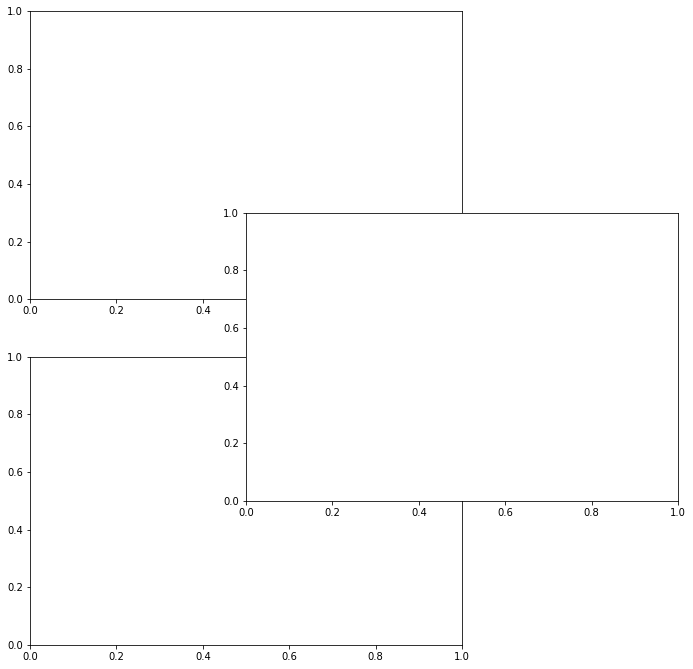

In [131]:
fig

`-` fig 의 세번째 액시즈에 접근

In [134]:
a3=fig.axes[2]   # id 찍어보면 어딘가게 엊장되어 있음. 오브젝트임
a3

<Axes:>

`-` 액시즈의 메소드중에 plot가 있음 -> 이것을 그림으로 그려보자

In [135]:
a3.plot([1,2,3],[4,5,3],'--r')   # --r : 점선으로 빨간색으로 

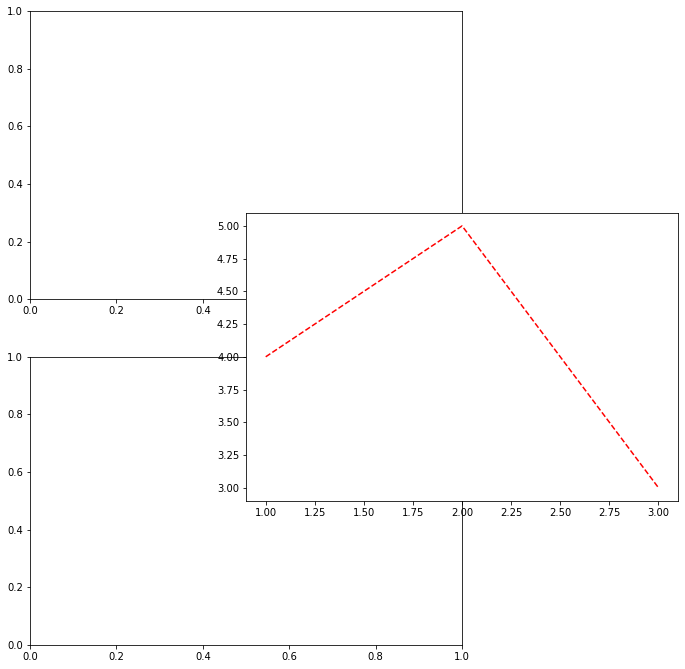

In [137]:
fig

`-` 다시 세번째 축에 접근하여 다른그림을 그려보자.

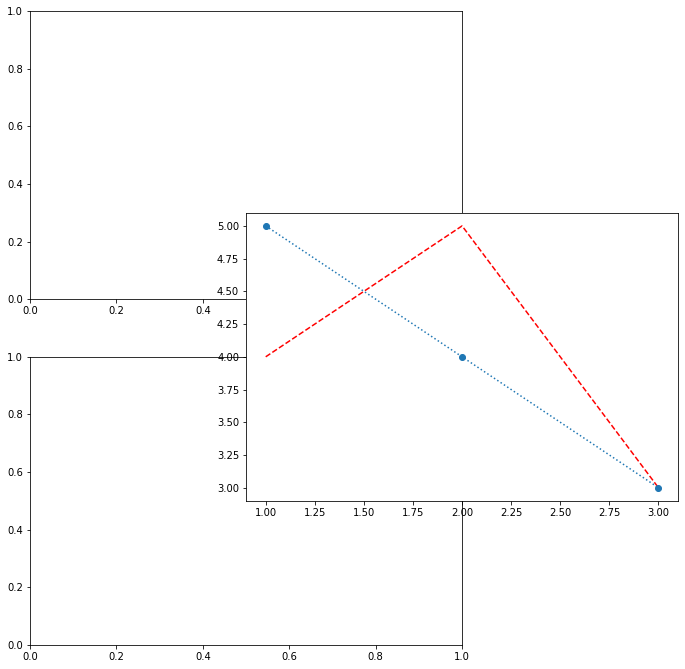

In [138]:
fig.axes[-1].plot([1,2,3],[5,4,3],':o')
fig

`-` 이제 첫번째 축에 접근하여 다른그림을 그려보자.

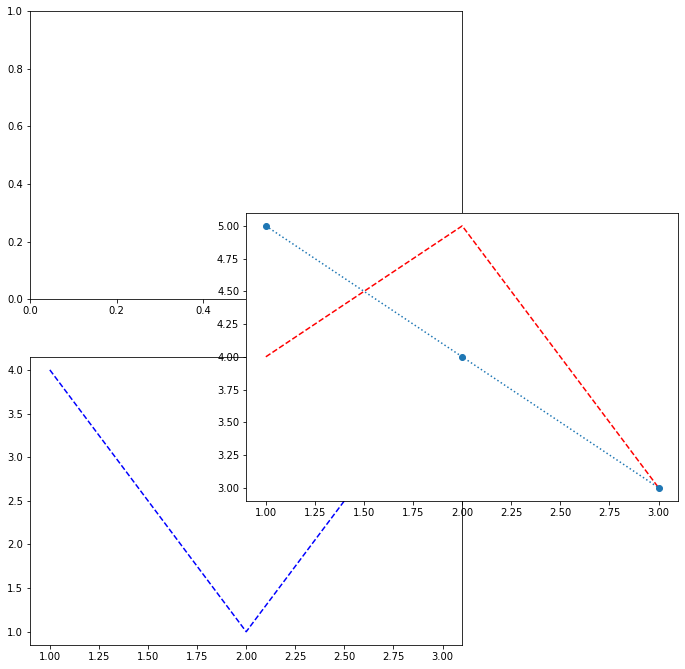

In [139]:
fig.axes[0].plot([1,2,3],[4,1,4],'--b')
fig

`-` 클래스에 대한 이해가 없다면 위와 같은 그림을 그리기도 힘들고 코드를 해석하기도 힘듬

### shallow copy

`-` 아래의 코드를 관찰하자.

In [140]:
a=[1,2,3]
b=a
a=a+[4]

현재 a,b의 출력 결과는?

In [143]:
a, b

([1, 2, 3, 4], [1, 2, 3])

`-` 이제 다시 아래의 코드를 관찰하자.

In [144]:
a=[1,2,3]
b=a
a.append(4)

현재 a,b의 출력 결과는?

In [145]:
a, b

([1, 2, 3, 4], [1, 2, 3, 4])